# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [10]:
# Pandaとnumpyの導入
import pandas as pd
import numpy as np

In [11]:
# 残差デ-タの導入
data = pd.read_excel('Resid.xlsx')

In [12]:
#デ-タ構造の検査
print(data.head())

   Year  Residuals
0  1981        NaN
1  1982  -0.105804
2  1983  -0.054828
3  1984  -0.071709
4  1985   0.019054


In [13]:
# 残差デ-タを変数に指定する
residual = data['Residuals'].values

In [14]:
# 時系列デ-タを構造する
def create_dataset(dataset, look_back=3):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back])
        y.append(dataset[i+look_back])
    return np.array(X), np.array(y)

In [15]:

look_back = 3  # 遅れ値lag
X, y = create_dataset(residual, look_back)

In [16]:
# 時系列デ-タを検査する
print(f'入力特性 X の形: {X.shape}')
print(f'出力目標 y 的形: {y.shape}')

入力特性 X の形: (40, 3)
出力目標 y 的形: (40,)


In [18]:
#Scriptの導入
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
#トレーニング セットとテスト セットを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# データの正規化
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# ニューラル ネットワークの入力要件の形状は次のとおりです[samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   - -------------------------------------- 11.3/390.3 MB 58.9 MB/s eta 0:00:07
   -- ------------------------------------- 23.3/390.3 MB 56.8 MB/s eta 0:00:07
   --- ------------------------------------ 35.4/390.3 MB 57.7 MB/s eta 0:00:07
   ---- ----------------------------------- 48.0/390.3 MB 57.6 MB/s eta 0:00:06
   ------ --------------------------------- 58.7/390.3 MB 55.8 MB/s eta 0:00:06
   ------ --------------------------------- 67.6/390.3 MB 53.9 MB/s eta 0:00:06
   ------- -------------------------------- 77.1/390.3 MB 52.3 MB/s eta 0:00:06
   -------- ------------------------------- 86.5/390.3 MB 51.1 MB/s eta 0:00:06
   --------- ------------------------------ 96.2/390.3 MB 50.8 MB/s eta 0:00:06
   ---------- ---------------------------- 106.2/390.3 MB 50.2 MB/s eta 0:00:06
   ----------- --------------------------- 116.4/390.3 MB 49.9 MB/s eta 0:00:06
   ------------ -------------------------- 126.9/


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:

#必要なライブラリをインポートする
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [25]:
# LSTM モデルを設定する
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))  # 出力部分

C:\Users\chenyan\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# モデルをコンパイルする
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# モデル構造を表示する
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# トレーニングモデル
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: nan - val_loss: nan
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: nan - val_loss: nan
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: nan - val_loss: nan
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: nan - val_loss: nan
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: nan - val_loss: nan
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: nan - val_loss: nan
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: nan - val_loss: nan
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: nan - val_loss: nan
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: nan - val_loss: nan
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: nan - val_loss: nan
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: nan - val_loss: nan
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: nan - val_loss: nan
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: nan - val_loss: n

In [29]:
# 予測する
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [31]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (32, 3, 1)
X_test shape: (8, 3, 1)


In [33]:
# ターゲット変数 (残差または真の値) を正規化します。
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
# テストセットの予測値と真の値を非正規化する
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # 予測値
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # 真の値

In [34]:
# 予測値を整形して非正規化する
predictions = predictions.reshape(-1, 1)  #予測値の形状が次であることを確認 (n_samples, 1)
predictions = scaler.inverse_transform(predictions)

# グラウンドトゥルースの形状を調整して非正規化する
y_test_original = y_test.reshape(-1, 1)  # テスト値の形状が次のとおりであることを確認 (n_samples, 1)
y_test_original = scaler.inverse_transform(y_test_original)

print("反归一化后的预测值:", predictions)
print("反归一化后的真实值:", y_test_original)

反归一化后的预测值: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
反归一化后的真实值: [[-0.19088494]
 [-0.10339022]
 [-0.14657907]
 [-0.09635198]
 [-0.1214686 ]
 [-0.19423088]
 [-0.14015331]
 [-0.18125783]]


In [35]:
# 检查预测值是否包含 NaN 或 Inf
print("预测值中的 NaN:", np.isnan(predictions).any())
print("预测值中的 Inf:", np.isinf(predictions).any())

预测值中的 NaN: True
预测值中的 Inf: False


In [36]:
# 将 NaN 替换为 0
predictions = np.nan_to_num(predictions)


In [37]:
print("归一化最小值:", scaler.data_min_)
print("归一化最大值:", scaler.data_max_)

归一化最小值: [-0.1490215]
归一化最大值: [0.2996169]


In [38]:
predictions = np.clip(predictions, scaler.data_min_, scaler.data_max_)

In [39]:
print("预测值形状:", predictions.shape)

预测值形状: (8, 1)


In [40]:
predictions = predictions.reshape(-1, 1)

In [41]:
# 归一化目标变量
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

In [42]:
# 非正規化
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

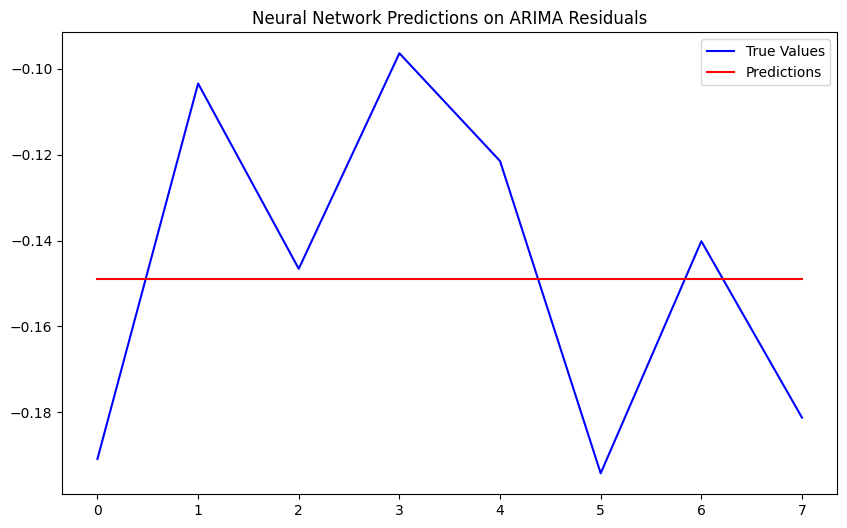

In [43]:
#予測結果の可視化
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='True Values', color='blue')
plt.plot(predictions, label='Predictions', color='red')
plt.title('Neural Network Predictions on ARIMA Residuals')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.001316960153032572
Root Mean Squared Error: 0.03628994561903575


In [51]:
# 提取滞后特征
look_back = 3  # 滞后步数（需与训练模型时一致）
latest_residual = residual[-look_back:]  # 提取最近 3 个残差
latest_residual = latest_residual.reshape(1, look_back, 1)  # 调整为 [samples, time_steps, features]

In [52]:
# 使用神经网络模型进行预测
predicted_residual = model.predict(latest_residuals)
print(f"神经网络预测的 2023 年残差值: {predicted_residual[0][0]}")

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [53]:
# 检查模型结构
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [55]:
# 假设 residuals 是一个包含残差值的数组
latest_residual = residual[-3:]  # 提取最近 3 个滞后值
latest_residual = latest_residual.reshape(1, 3, 1)  # 调整为 (batch_size=1, time_steps=3, features=1)


In [56]:
print(f"输入数据的形状: {latest_residuals.shape}")

输入数据的形状: (3,)


In [58]:
# 假设 residuals[-3:] 是最近的 3 个滞后残差
latest_residual = residual[-3:]  # 获取最近的 3 个残差
latest_residual = latest_residual.reshape(1, 3, 1)  # 调整为 (batch_size=1, time_steps=3, features=1)

# 检查调整后的形状
print(f"调整后的输入数据形状: {latest_residual.shape}")

调整后的输入数据形状: (1, 3, 1)


In [62]:
# 使用神经网络模型预测
predicted_residual = model.predict(latest_residual)

# 打印预测结果
print(f"神经网络预测的 2023 年残差值: {predicted_residual[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
神经网络预测的 2023 年残差值: nan


In [1]:
import pandas as pd
import numpy as np

# 加载残差数据
residuals = pd.read_excel("Resid.xlsx")  # 确保文件路径正确
residuals = residuals['Residuals'].values  # 转换为 NumPy 数组

# 检查数据
print("残差数据:", residuals)
print("残差数据形状:", residuals.shape)

残差数据: [       nan -0.1058038 -0.0548284 -0.0717091  0.0190537 -0.094351
  0.1006633  0.0614145  0.0574312 -0.049983   0.0016827  0.2538864
  0.0201152  0.0871476  0.2996169 -0.1007702 -0.1490215 -0.0396324
  0.0054441  0.1017106 -0.0618232  0.1711903 -0.0933122  0.1216526
  0.008783   0.062648  -0.0931566 -0.0102034 -0.0726138  0.1173986
 -0.0718537 -0.0245493 -0.0413057 -0.0331649 -0.0840103 -0.0361076
 -0.0082263 -0.0255107 -0.0228548 -0.0882552  0.0197669 -0.0126801
 -0.0083615]
残差数据形状: (43,)


In [66]:
# 构造滞后输入
look_back = 3
latest_residuals = residuals[-look_back:]  # 提取最近的 3 个残差
latest_residuals = latest_residuals.reshape(1, look_back, 1)  # 调整形状为 (1, 3, 1)

# 检查输入形状
print("最新滞后残差输入形状:", latest_residuals.shape)
print("最新滞后残差数据:", latest_residuals)

最新滞后残差输入形状: (1, 3, 1)
最新滞后残差数据: [[[ 0.0197669]
  [-0.0126801]
  [-0.0083615]]]


In [68]:
look_back = 3
latest_residuals = residuals[-look_back:].reshape(1, look_back, 1)  # 提取最近 3 个残差，调整形状为 (1, 3, 1)


In [69]:
# 3. 定义或加载训练好的神经网络模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))  # 输出层
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\chenyan\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
predicted_residual = model.predict(latest_residuals)
print(f"ニューラルネットワークによる2023年の残存価値予測: {predicted_residual[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
神经网络预测的 2023 年残差值: -2.6123980205738917e-05


In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. 加载残差数据
residuals = pd.read_excel("Resid.xlsx")  # 确保文件路径正确
residuals = residuals['Residuals'].values  # 转换为 NumPy 数组
residuals = np.nan_to_num(residuals, nan=0.0, posinf=0.0, neginf=0.0)
# 检查数据
print("残差数据:", residuals)
print("残差数据形状:", residuals.shape)

# 2. 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))  # 将数据归一化到 [0, 1] 范围
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

# 3. 构造时间序列数据集（滞后步数）
def create_dataset(dataset, look_back=3):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 3  # 滞后步数
X, y = create_dataset(residuals_scaled, look_back)

# 调整输入数据的形状为 (samples, time_steps, features)
X = X.reshape(X.shape[0], look_back, 1)

# 检查数据形状
print(f"输入特征 X 的形状: {X.shape}")
print(f"目标变量 y 的形状: {y.shape}")

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 定义 LSTM 神经网络模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))  # 第一层 LSTM
model.add(LSTM(50, return_sequences=False))  # 第二层 LSTM
model.add(Dense(25))  # 全连接层
model.add(Dense(1))  # 输出层
model.compile(optimizer='adam', loss='mean_squared_error')

# 打印模型结构
model.summary()

# 6. 模型训练
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 7. 评估模型性能
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"训练集损失: {train_loss}")
print(f"测试集损失: {test_loss}")

# 8. 保存模型
model.save("lstm_residual_model.h5")
print("模型已保存。")

残差数据: [ 0.        -0.1058038 -0.0548284 -0.0717091  0.0190537 -0.094351
  0.1006633  0.0614145  0.0574312 -0.049983   0.0016827  0.2538864
  0.0201152  0.0871476  0.2996169 -0.1007702 -0.1490215 -0.0396324
  0.0054441  0.1017106 -0.0618232  0.1711903 -0.0933122  0.1216526
  0.008783   0.062648  -0.0931566 -0.0102034 -0.0726138  0.1173986
 -0.0718537 -0.0245493 -0.0413057 -0.0331649 -0.0840103 -0.0361076
 -0.0082263 -0.0255107 -0.0228548 -0.0882552  0.0197669 -0.0126801
 -0.0083615]
残差数据形状: (43,)
输入特征 X 的形状: (40, 3, 1)
目标变量 y 的形状: (40,)


C:\Users\chenyan\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 0.1810 - val_loss: 0.1252
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1225 - val_loss: 0.1034
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1107 - val_loss: 0.0837
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1000 - val_loss: 0.0668
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0719 - val_loss: 0.0540
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0575 - val_loss: 0.0468
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0499 - val_loss: 0.0466
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0434 - val_loss: 0.0512
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0478 - val_loss: 0.0542
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0517 - val_loss: 0.0541
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0569 - val_loss: 0.0519
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0419 - val_loss: 0.0487


训练集损失: 0.04457126185297966
测试集损失: 0.047426365315914154
模型已保存。


In [5]:
from tensorflow.keras.models import load_model

# 加载已保存的模型
model = load_model("lstm_residual_model.h5")

# 构造预测输入
latest_residuals = residuals[-look_back:].reshape(1, look_back, 1)  # 提取最近 3 个残差
predicted_residual = model.predict(latest_residuals)

# 打印预测结果
print(f"神经网络预测的 2023 年残差值: {predicted_residual[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
神经网络预测的 2023 年残差值: 0.2336939424276352
